Import of libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_colwidth', None)

Dataset import

In [2]:
filepath = '../data/raw/Spam_SMS.csv'
df = pd.read_csv(filepath)

In [3]:
df.head(10)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [19]:
df.dtypes

Class      object
Message    object
dtype: object

Converting datatype of Class column from object to category.

In [20]:
df['Class'] = df['Class'].astype('category')
df.dtypes

Class      category
Message      object
dtype: object

In [21]:
df.isnull().any().sum()

0

In [22]:
df['Class'].value_counts().reset_index()

,Class,count
0,ham,4827
1,spam,747


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


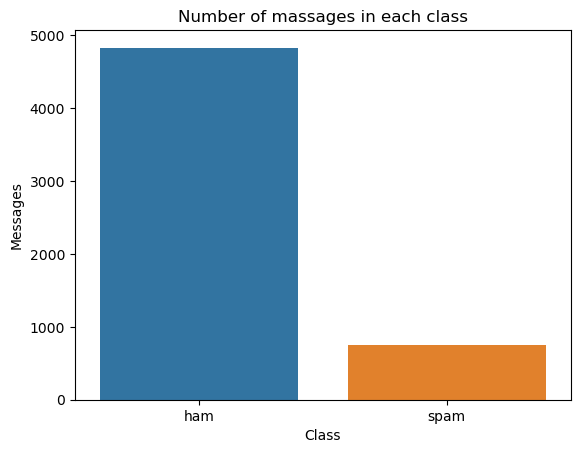

In [23]:
#bar plot
sns.countplot(data = df, x = 'Class')
plt.title('Number of massages in each class')
plt.ylabel('Messages')
plt.show()

Data is highly imbalanced. Let's check message length for each class.

In [ ]:
count

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


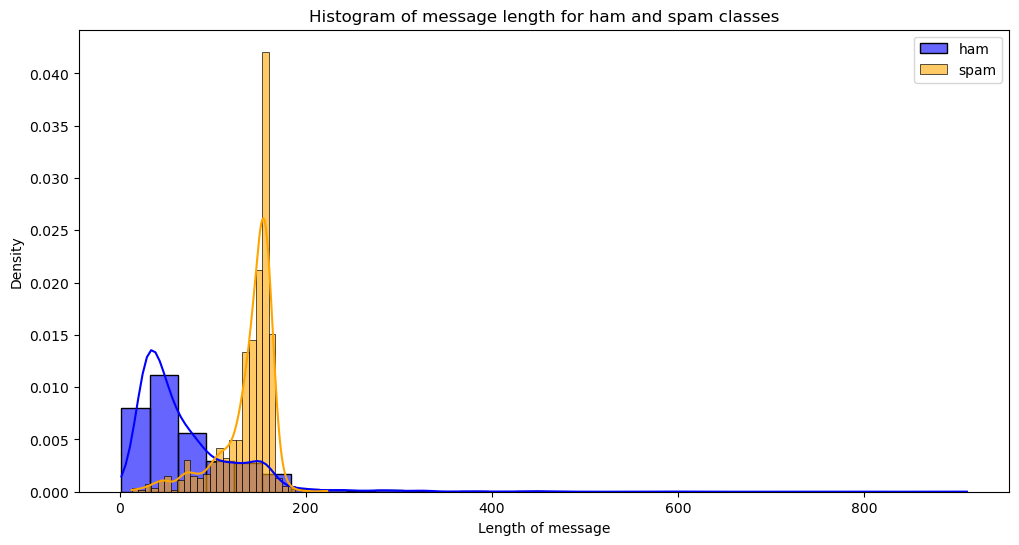

In [33]:
#adding new column [Message_Length] which will contain length of each SMS
df['Message_Length'] = df['Message'].apply(len)
#dividing data to 2 classes
ham_message_length = df[df['Class'] == 'ham']['Message_Length']
spam_message_length = df[df['Class'] == 'spam']['Message_Length']

#histogram

plt.figure(figsize=(12,6))

sns.histplot(ham_message_length, bins=30, color='blue', label='ham', kde=True, stat='density', alpha=0.6)
sns.histplot(spam_message_length, bins=30, color='orange', label='spam', kde=True, stat='density', alpha=0.6)

plt.title('Histogram of message length for ham and spam classes')
plt.xlabel('Length of message')
plt.ylabel('Density')
plt.legend()

plt.show()
